# Tutorial Visualisasi Data dengan Seaborn

Selamat datang di tutorial visualisasi data menggunakan Seaborn! Seaborn adalah library visualisasi data Python yang dibangun di atas matplotlib dan terintegrasi dengan pandas.

## Daftar Isi:
1. Pengenalan Seaborn
2. Persiapan Data
3. Jenis-jenis Plot
   - Relational plots (relplot)
   - Categorical plots (catplot)
   - Distribution plots (displot)
   - Regression plots (regplot)
   - Matrix plots (heatmap)
4. Styling dan Customization
5. Studi Kasus
6. Latihan

## 1. Pengenalan dan Setup

Mari kita mulai dengan mengimport library yang diperlukan dan mengatur style dasar:

In [58]:
# Import library yang diperlukan
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.style.use('seaborn')

# Set random seed untuk reproduktifitas
np.random.seed(42)

# Tampilkan versi seaborn
print(f"Seaborn version: {sns.__version__}")

# Buat data sampel
n_samples = 100
data = {
    'x': np.random.normal(0, 1, n_samples),
    'y': np.random.normal(0, 1, n_samples),
    'category': np.random.choice(['A', 'B', 'C'], n_samples),
    'value': np.random.uniform(0, 100, n_samples),
    'group': np.random.choice(['Group 1', 'Group 2'], n_samples)
}

df = pd.DataFrame(data)
print("\nSample data:")
print(df.head())

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [60]:
# Import library yang diperlukan
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set style
sns.set_style("whitegrid")

# Set random seed untuk reproduktifitas
np.random.seed(42)

# Buat data sampel
n_samples = 100
data = {
    'x': np.random.normal(0, 1, n_samples),
    'y': np.random.normal(0, 1, n_samples),
    'category': np.random.choice(['A', 'B', 'C'], n_samples),
    'value': np.random.uniform(0, 100, n_samples),
    'group': np.random.choice(['Group 1', 'Group 2'], n_samples)
}

df = pd.DataFrame(data)
print("Sample data:")
print(df.head())

Sample data:
          x         y category      value    group
0  0.496714 -1.415371        B  12.016465  Group 2
1 -0.138264 -0.420645        B  34.187967  Group 2
2  0.647689 -0.342715        A   9.179907  Group 1
3  1.523030 -0.802277        A   9.415699  Group 1
4 -0.234153 -0.161286        A  31.141331  Group 2


## 2. Relational Plots

Seaborn menyediakan beberapa jenis plot untuk menampilkan hubungan antara variabel:

1. **scatterplot**: Menampilkan hubungan antara dua variabel numerik
2. **lineplot**: Menampilkan tren hubungan antara variabel
3. **relplot**: Plot relasional yang lebih fleksibel dengan berbagai parameter

Mari kita lihat contoh masing-masing:

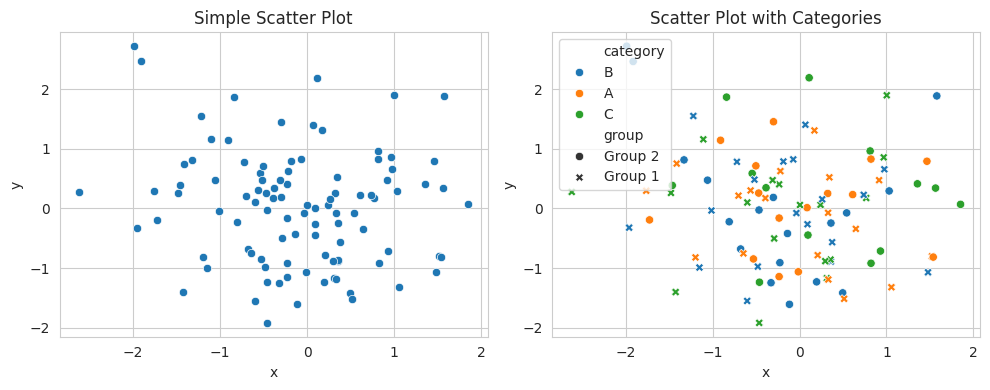

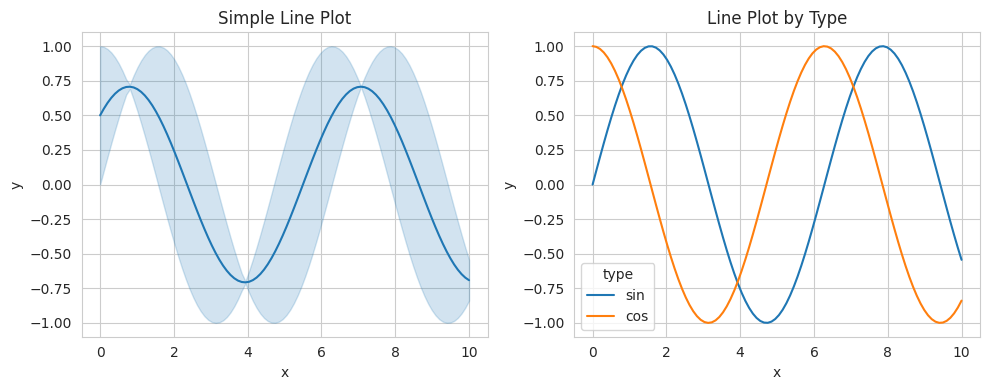

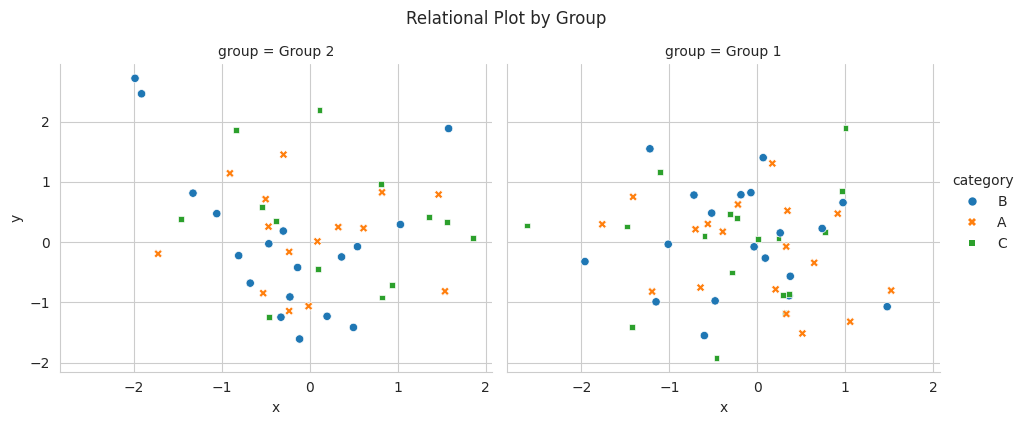

In [62]:
# 1. Scatter plot sederhana
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.scatterplot(data=df, x='x', y='y')
plt.title('Simple Scatter Plot')

plt.subplot(122)
sns.scatterplot(data=df, x='x', y='y', hue='category', style='group')
plt.title('Scatter Plot with Categories')

plt.tight_layout()
plt.show()

# 2. Line plot
plt.figure(figsize=(10, 4))

# Buat data baru untuk line plot
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
line_data = pd.DataFrame({'x': np.concatenate([x, x]),
                         'y': np.concatenate([y1, y2]),
                         'type': ['sin']*100 + ['cos']*100})

plt.subplot(121)
sns.lineplot(data=line_data, x='x', y='y')
plt.title('Simple Line Plot')

plt.subplot(122)
sns.lineplot(data=line_data, x='x', y='y', hue='type')
plt.title('Line Plot by Type')

plt.tight_layout()
plt.show()

# 3. Relplot dengan berbagai parameter
g = sns.relplot(data=df, x='x', y='y', col='group',
                hue='category', style='category',
                kind='scatter', height=4, aspect=1.2)
g.fig.suptitle('Relational Plot by Group', y=1.05)
plt.show()

## 3. Categorical Plots

Seaborn memiliki berbagai jenis plot untuk menampilkan data kategorikal:

1. **boxplot**: Menampilkan distribusi data dengan box dan whiskers
2. **violinplot**: Menampilkan distribusi data dengan estimasi kernel density
3. **swarmplot**: Menampilkan semua titik data tanpa tumpang tindih
4. **barplot**: Menampilkan estimasi rata-rata dengan confidence intervals

Mari kita lihat contoh-contohnya:

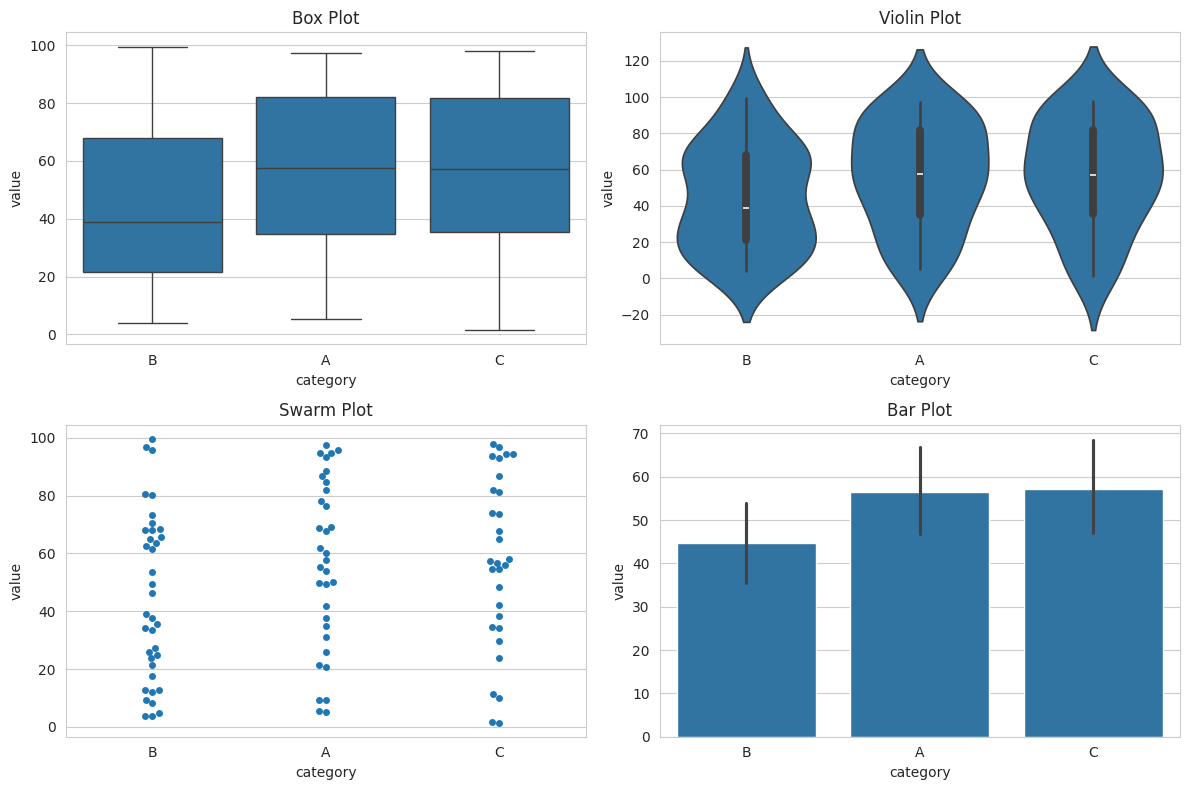

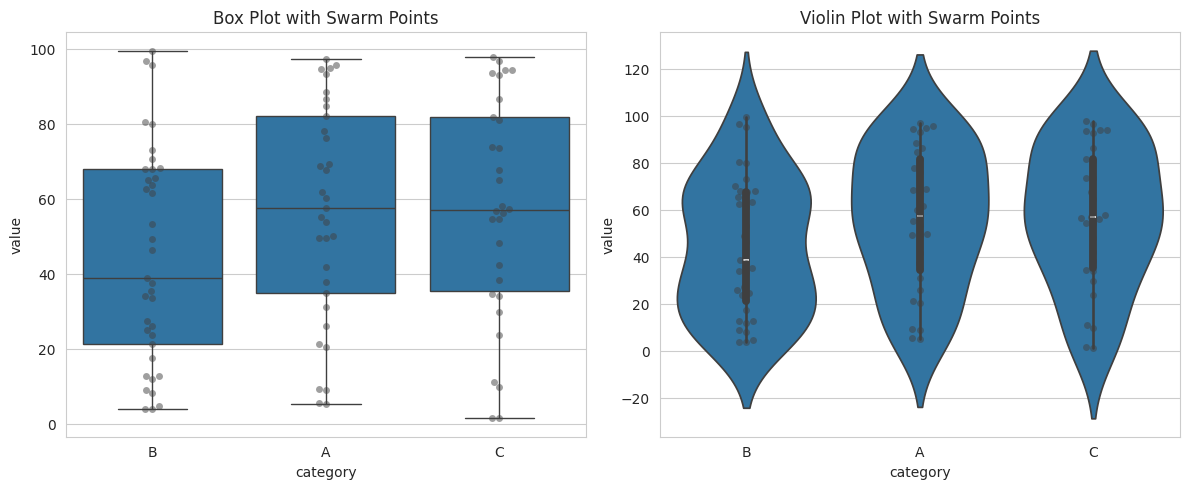

In [64]:
# Buat figure dengan 2x2 subplots
plt.figure(figsize=(12, 8))

# 1. Box Plot
plt.subplot(221)
sns.boxplot(data=df, x='category', y='value')
plt.title('Box Plot')

# 2. Violin Plot
plt.subplot(222)
sns.violinplot(data=df, x='category', y='value')
plt.title('Violin Plot')

# 3. Swarm Plot
plt.subplot(223)
sns.swarmplot(data=df, x='category', y='value')
plt.title('Swarm Plot')

# 4. Bar Plot
plt.subplot(224)
sns.barplot(data=df, x='category', y='value')
plt.title('Bar Plot')

plt.tight_layout()
plt.show()

# Kombinasi plot yang sering digunakan
plt.figure(figsize=(12, 5))

# Box plot dengan swarm plot
plt.subplot(121)
sns.boxplot(data=df, x='category', y='value')
sns.swarmplot(data=df, x='category', y='value', color='0.25', alpha=0.5)
plt.title('Box Plot with Swarm Points')

# Violin plot dengan swarm plot
plt.subplot(122)
sns.violinplot(data=df, x='category', y='value')
sns.swarmplot(data=df, x='category', y='value', color='0.25', alpha=0.5)
plt.title('Violin Plot with Swarm Points')

plt.tight_layout()
plt.show()

## 4. Distribution Plots

Seaborn menyediakan beberapa jenis plot untuk menampilkan distribusi data:

1. **histplot**: Histogram untuk melihat distribusi satu variabel
2. **kdeplot**: Kernel Density Estimation plot
3. **displot**: Figure-level interface untuk distribusi plotting
4. **jointplot**: Plot distribusi bivariat dengan distribusi marginal

Mari kita lihat contoh-contohnya:

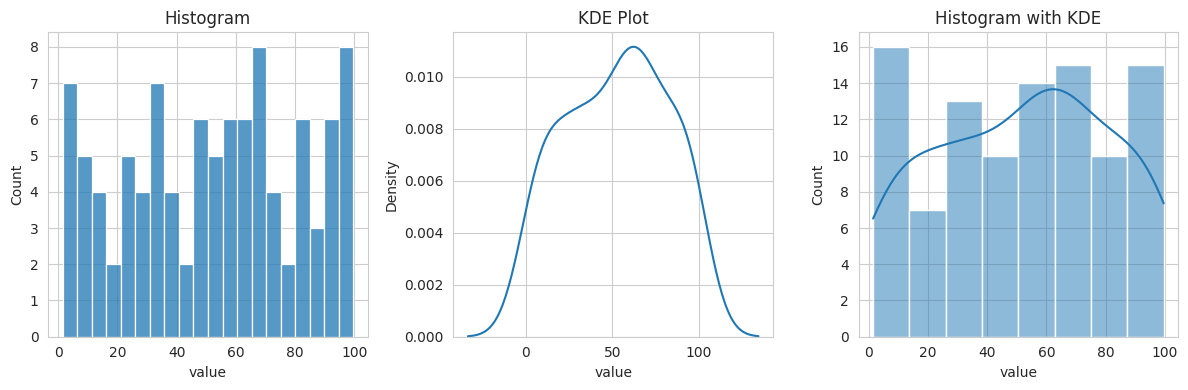

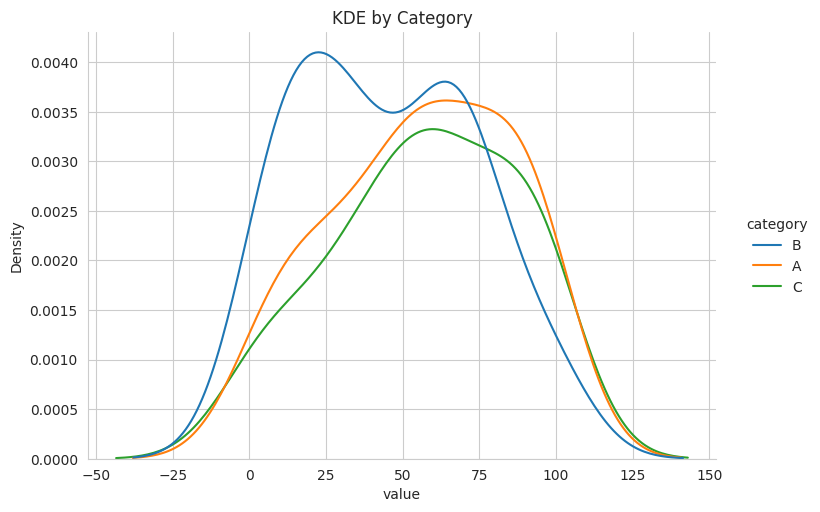

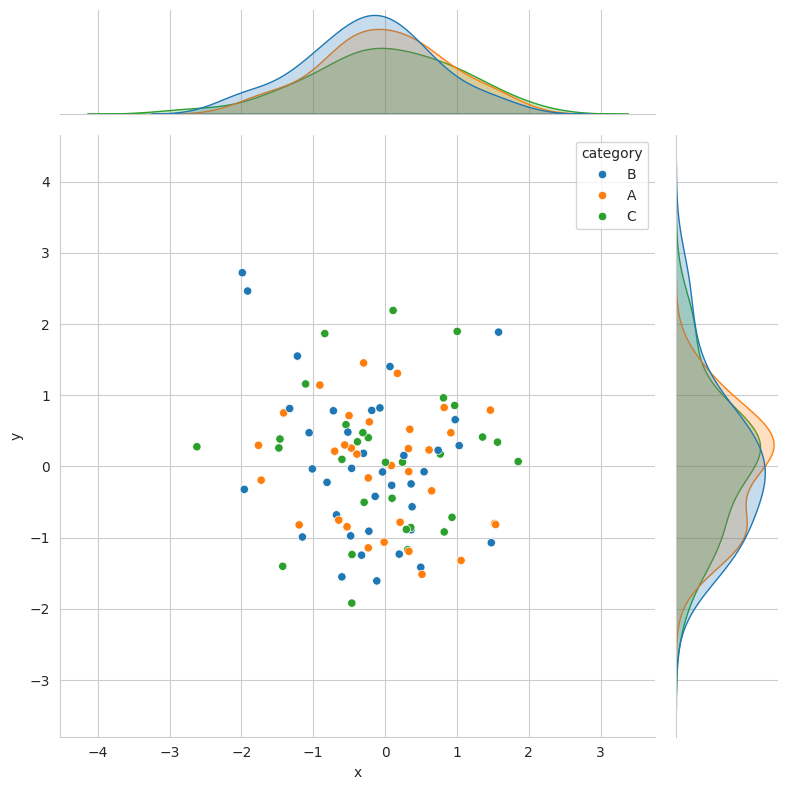

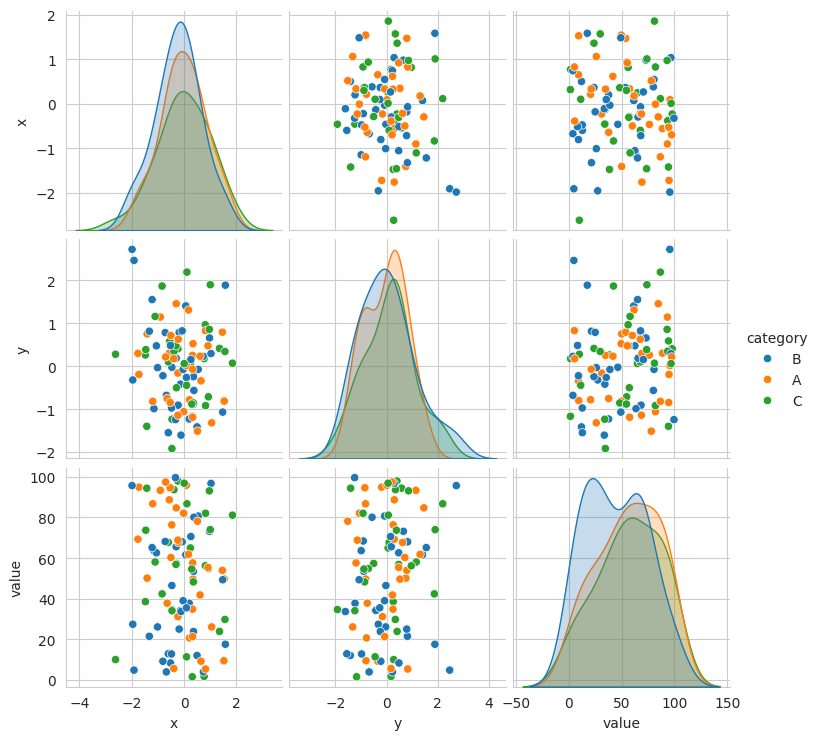

In [68]:
# 1. Histogram dan KDE
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.histplot(data=df, x='value', bins=20)
plt.title('Histogram')

plt.subplot(132)
sns.kdeplot(data=df, x='value')
plt.title('KDE Plot')

plt.subplot(133)
sns.histplot(data=df, x='value', kde=True)
plt.title('Histogram with KDE')

plt.tight_layout()
plt.show()

# 2. Displot dengan berbagai style
g = sns.displot(data=df, x='value', hue='category',
                kind='kde', height=5, aspect=1.5)
plt.title('KDE by Category')
plt.show()

# 3. Jointplot untuk distribusi bivariat
g = sns.jointplot(data=df, x='x', y='y', hue='category',
                 height=8)
plt.show()

# 4. Pairplot untuk melihat semua hubungan
g = sns.pairplot(df, hue='category', diag_kind='kde')
plt.show()

## 5. Regression Plots

Seaborn menyediakan beberapa plot untuk menampilkan hubungan regresi:

1. **regplot**: Plot scatter dengan garis regresi
2. **lmplot**: Figure-level interface untuk plot regresi
3. **residplot**: Plot residual dari regresi linear

Mari kita lihat contoh-contohnya:

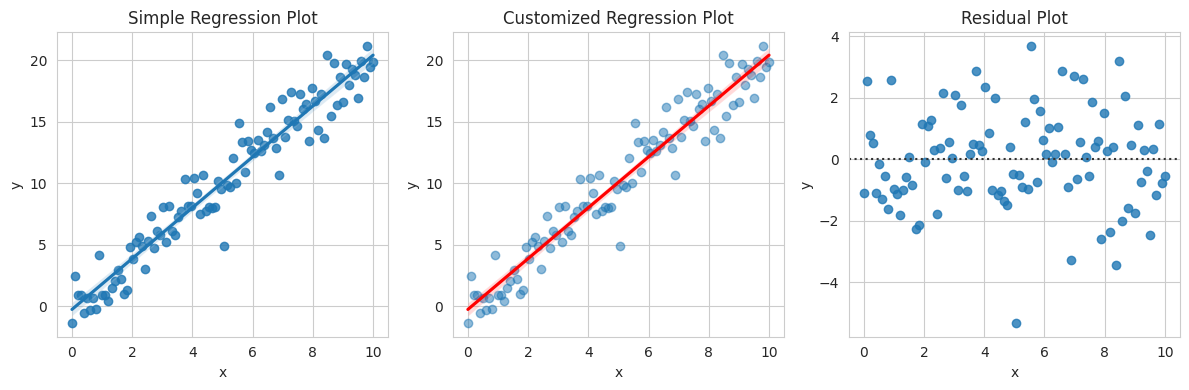

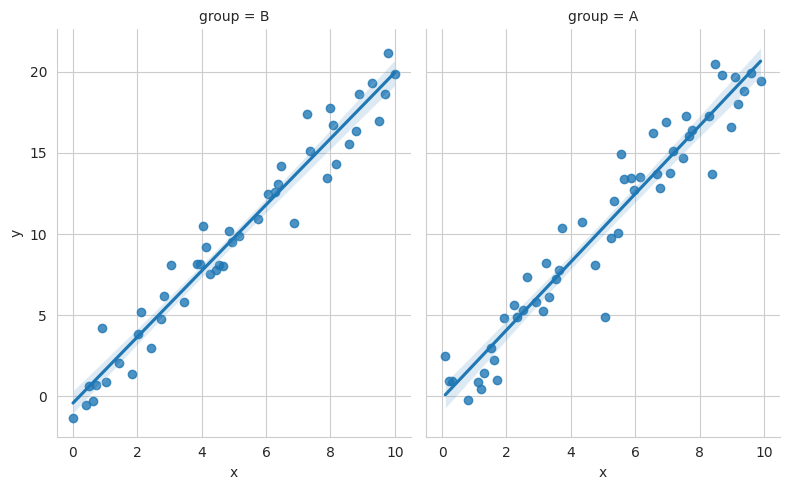

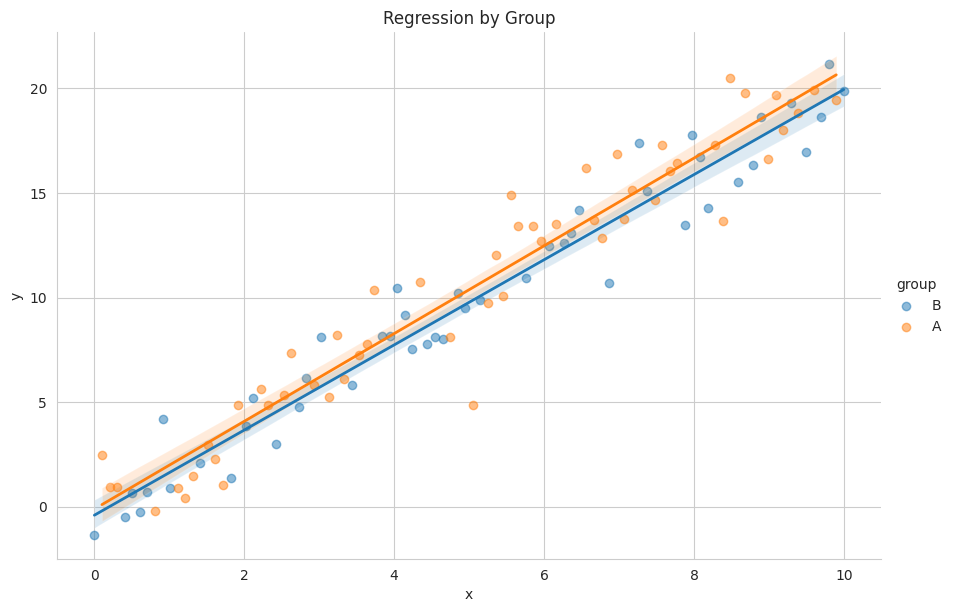

In [70]:
# Buat data baru dengan hubungan linear yang jelas
n = 100
x = np.linspace(0, 10, n)
y = 2 * x + np.random.normal(0, 1.5, n)
df_reg = pd.DataFrame({'x': x, 'y': y, 
                      'group': np.random.choice(['A', 'B'], n)})

# 1. Simple regression plot
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.regplot(data=df_reg, x='x', y='y')
plt.title('Simple Regression Plot')

plt.subplot(132)
sns.regplot(data=df_reg, x='x', y='y', 
            scatter_kws={'alpha':0.5}, 
            line_kws={'color': 'red'})
plt.title('Customized Regression Plot')

plt.subplot(133)
sns.residplot(data=df_reg, x='x', y='y')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# 2. lmplot dengan grouping
g = sns.lmplot(data=df_reg, x='x', y='y', col='group',
               height=5, aspect=.8)
plt.show()

# 3. Advanced regression plot
g = sns.lmplot(data=df_reg, x='x', y='y', hue='group',
               height=6, aspect=1.5,
               scatter_kws={'alpha':0.5},
               line_kws={'linewidth':2})
plt.title('Regression by Group')
plt.show()

## 6. Matrix Plots

Seaborn menyediakan beberapa jenis plot untuk menampilkan data dalam bentuk matriks:

1. **heatmap**: Menampilkan data numerik sebagai peta warna
2. **clustermap**: Heatmap dengan clustering hierarkis

Mari kita lihat contoh-contohnya:

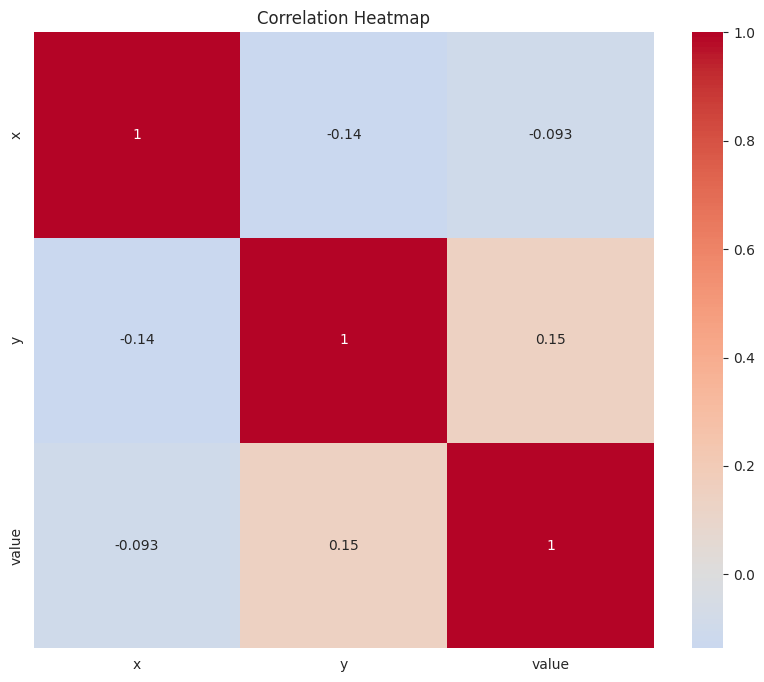

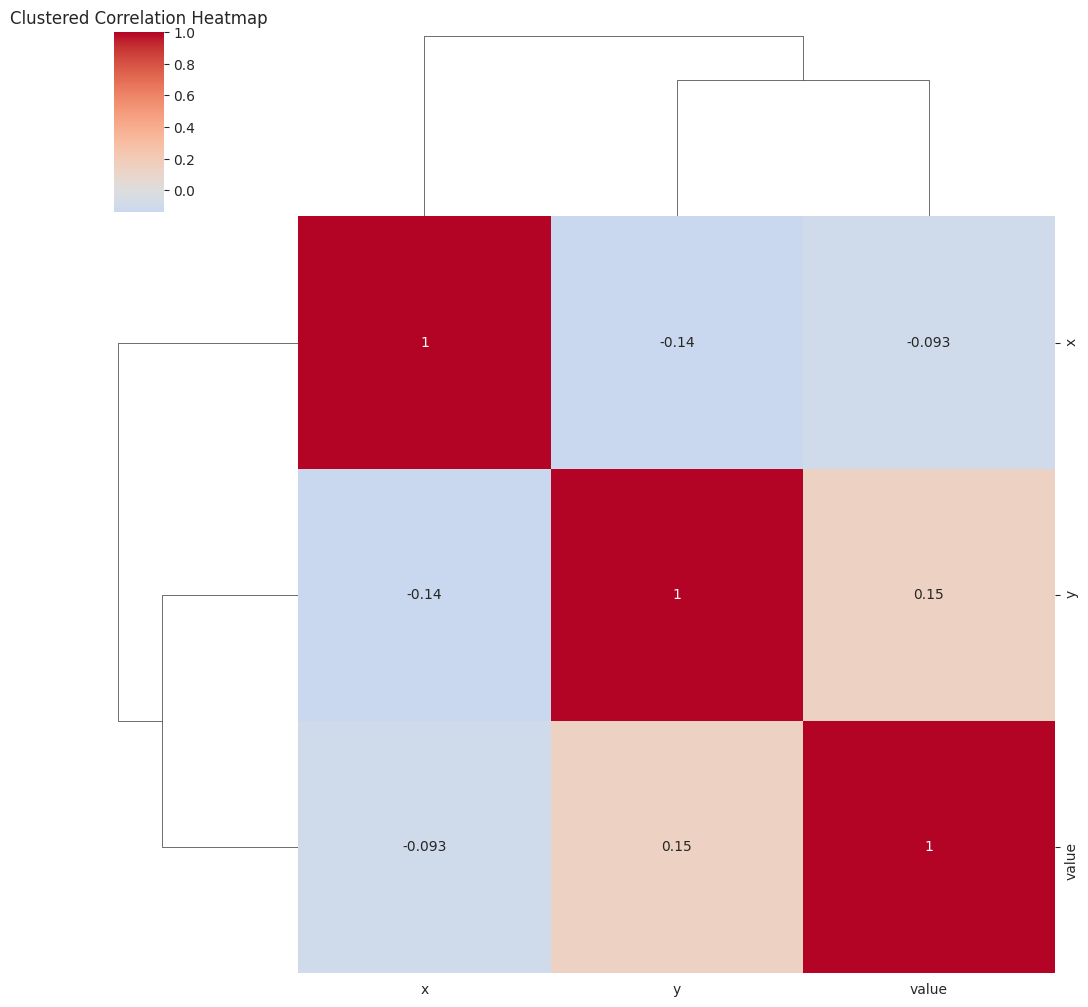

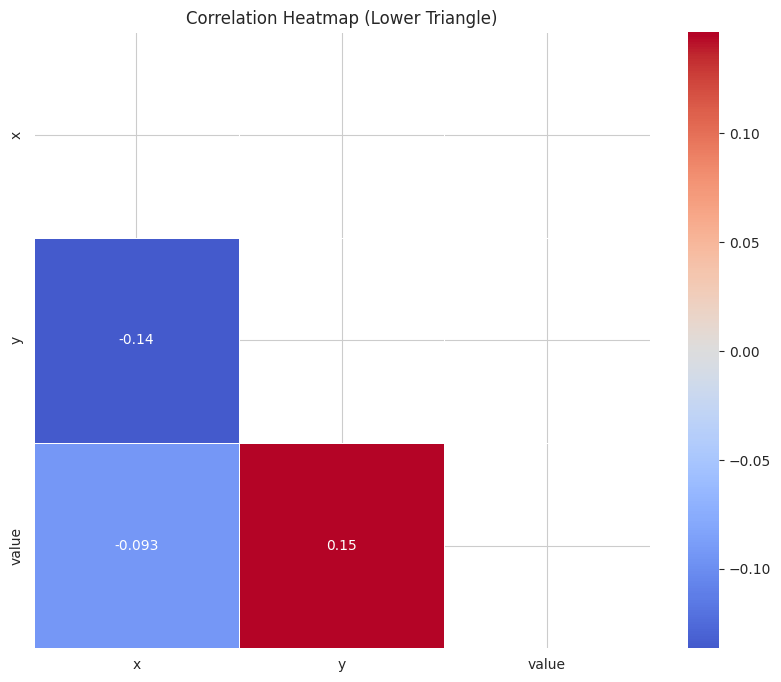

In [71]:
# Buat data correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()

# 1. Simple heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 2. Clustermap
g = sns.clustermap(corr, annot=True, cmap='coolwarm', center=0,
                   figsize=(10, 10))
plt.title('Clustered Correlation Heatmap')
plt.show()

# 3. Advanced heatmap dengan mask
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=.5)
plt.title('Correlation Heatmap (Lower Triangle)')
plt.show()

## 7. Styling dan Customization

Seaborn menyediakan berbagai opsi untuk menyesuaikan tampilan plot:

1. Themes dan Styles
2. Color Palettes
3. Figure Aesthetics
4. Plot Elements

Mari kita lihat beberapa contoh customization:

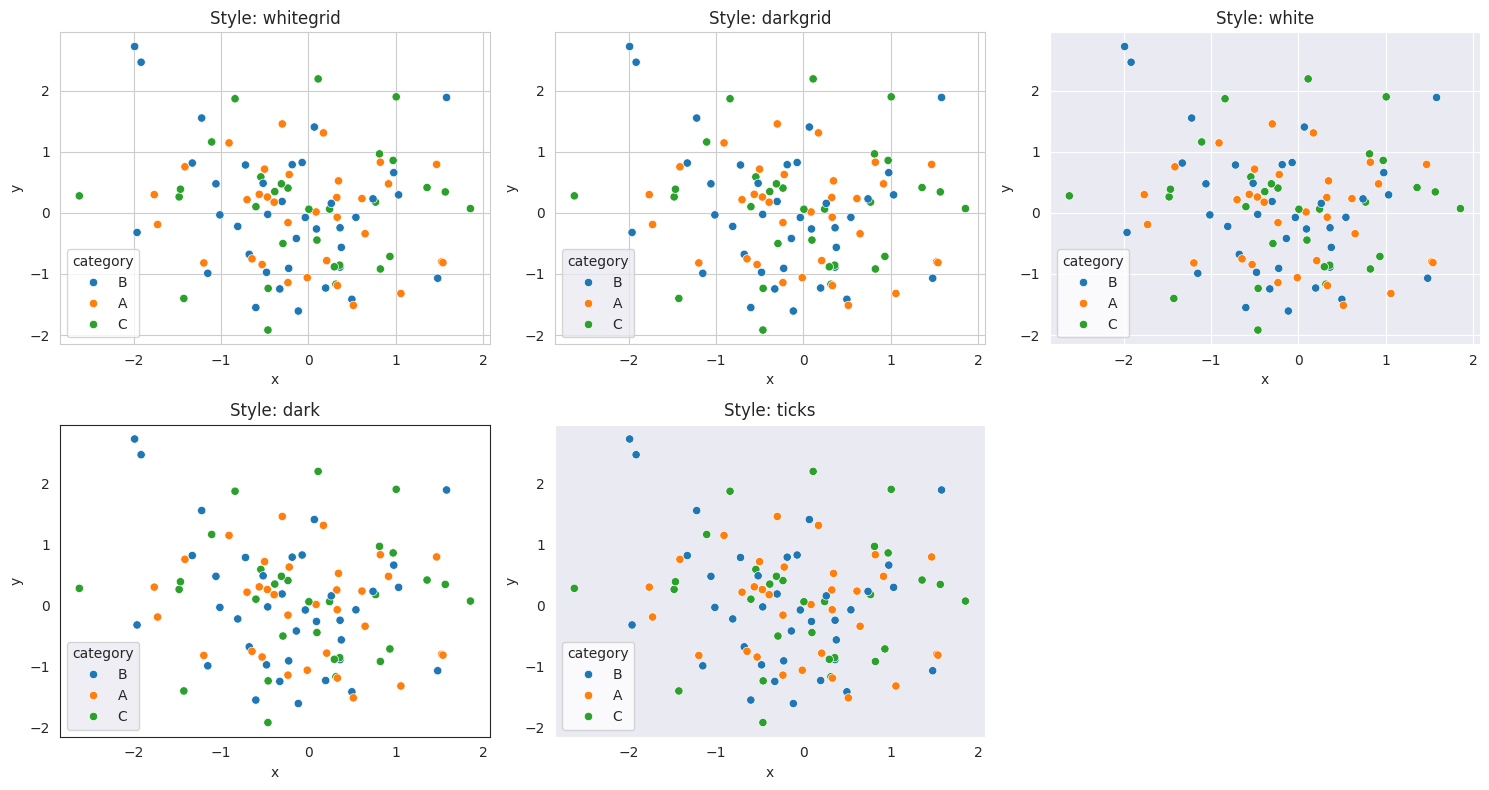

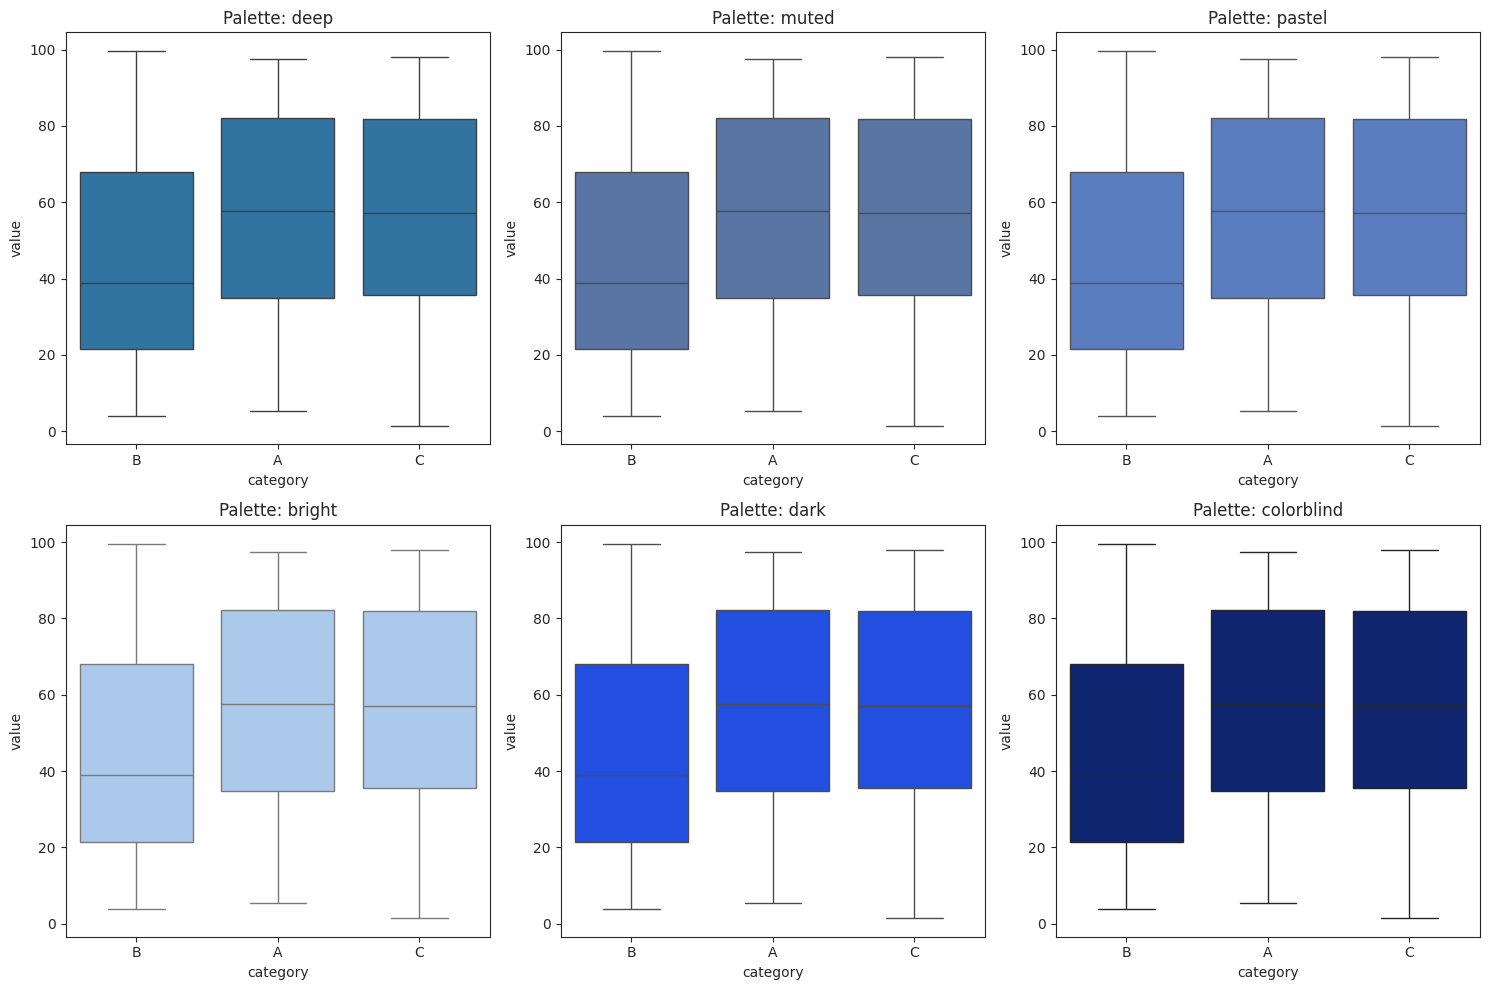

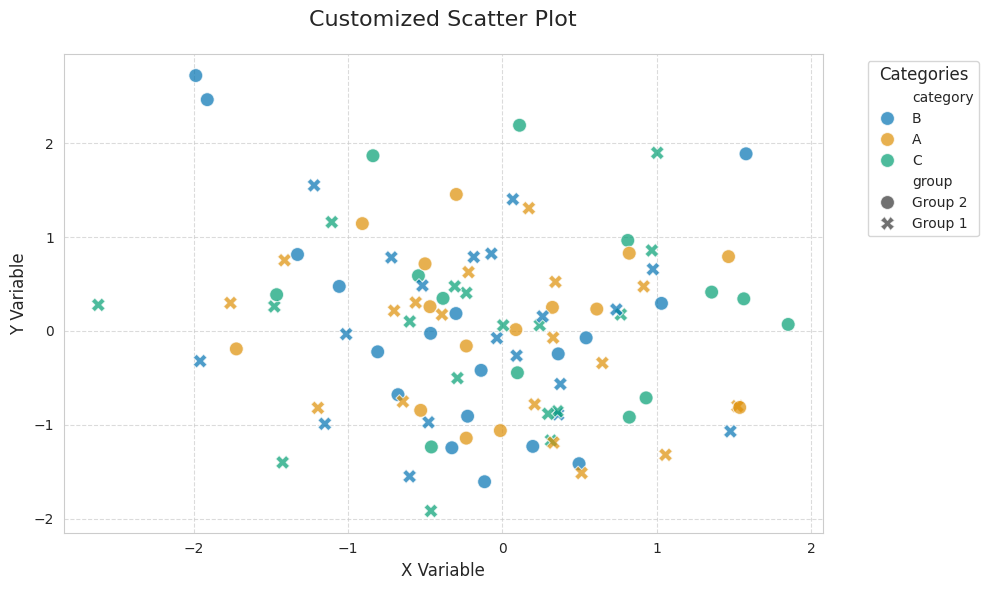

In [72]:
# 1. Different styles
styles = ['whitegrid', 'darkgrid', 'white', 'dark', 'ticks']
fig = plt.figure(figsize=(15, 8))

for idx, style in enumerate(styles, 1):
    plt.subplot(2, 3, idx)
    sns.set_style(style)
    sns.scatterplot(data=df, x='x', y='y', hue='category')
    plt.title(f'Style: {style}')

plt.tight_layout()
plt.show()

# 2. Different color palettes
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']
fig = plt.figure(figsize=(15, 10))

for idx, palette in enumerate(palettes, 1):
    plt.subplot(2, 3, idx)
    sns.set_palette(palette)
    sns.boxplot(data=df, x='category', y='value')
    plt.title(f'Palette: {palette}')

plt.tight_layout()
plt.show()

# 3. Custom plot with multiple customizations
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create custom plot
sns.scatterplot(data=df, x='x', y='y', hue='category', style='group',
                s=100, alpha=0.7)

# Customize title and labels
plt.title('Customized Scatter Plot', pad=20, fontsize=16)
plt.xlabel('X Variable', fontsize=12)
plt.ylabel('Y Variable', fontsize=12)

# Customize legend
plt.legend(title='Categories', title_fontsize=12, fontsize=10,
           bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid with custom style
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

## 8. Latihan

Gunakan dataset yang telah kita buat untuk menyelesaikan soal-soal berikut:

1. Buat visualisasi yang menunjukkan distribusi nilai untuk setiap kategori menggunakan violin plot dan swarm plot
2. Buat scatter plot yang menunjukkan hubungan antara x dan y, dengan warna berbeda untuk setiap kategori dan ukuran point berdasarkan value
3. Buat pair plot untuk semua variabel numerik dengan warna berdasarkan group
4. Buat heatmap yang menunjukkan korelasi antar variabel numerik dengan custom colormap
5. Buat plot regresi yang menunjukkan hubungan antara x dan value untuk setiap group

Berikut template kode untuk memulai latihan:

In [73]:
# Template untuk latihan

# Soal 1: Violin plot dengan swarm plot
# Lengkapi kode di sini...

# Soal 2: Scatter plot dengan multiple aesthetics
# Lengkapi kode di sini...

# Soal 3: Pair plot
# Lengkapi kode di sini...

# Soal 4: Custom heatmap
# Lengkapi kode di sini...

# Soal 5: Regression plot by group
# Lengkapi kode di sini...

### Solusi Latihan

Berikut adalah solusi untuk latihan di atas. Cobalah untuk mengerjakan sendiri terlebih dahulu sebelum melihat solusi!

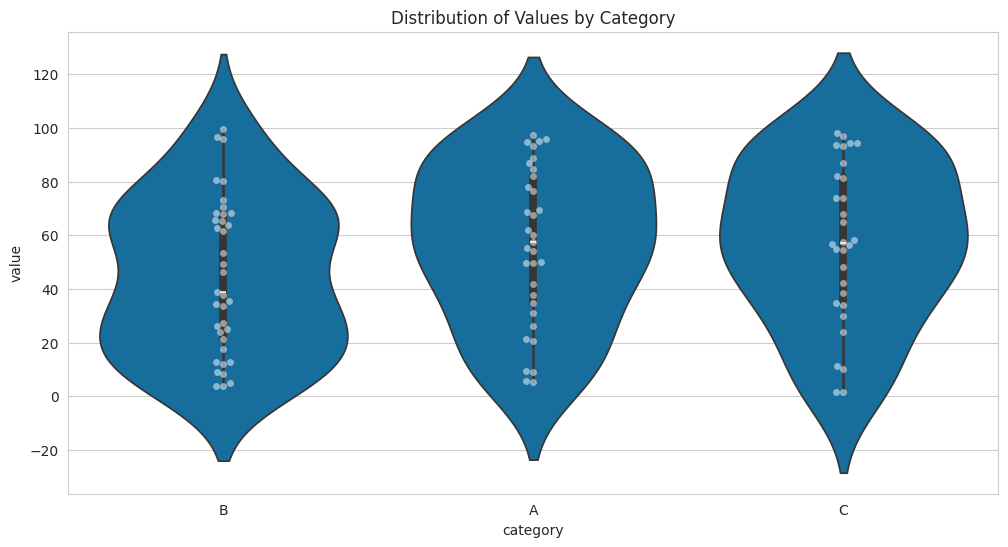

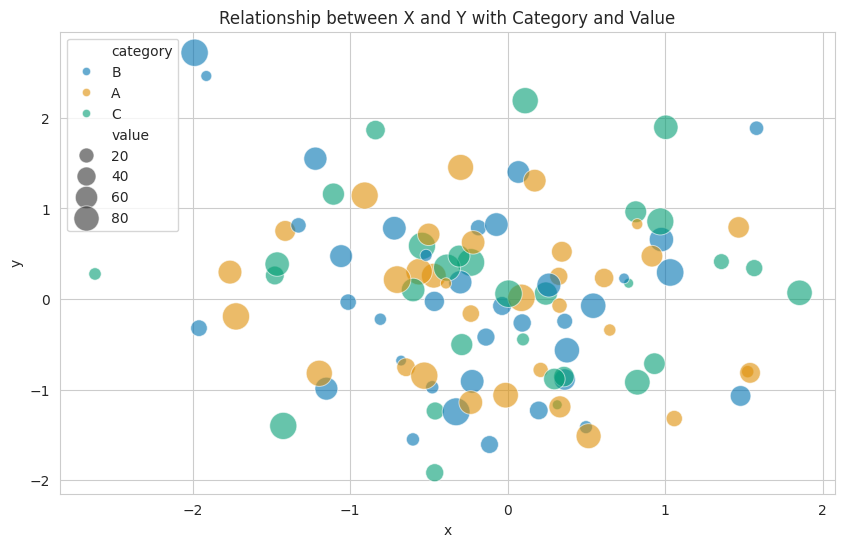

KeyError: 'group'

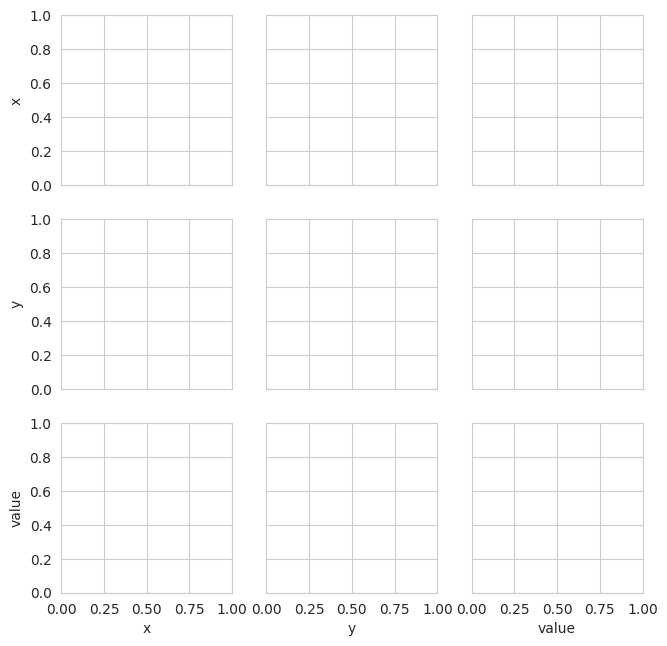

In [75]:
# Solusi Soal 1: Violin plot dengan swarm plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='category', y='value')
sns.swarmplot(data=df, x='category', y='value', color='white', alpha=0.5)
plt.title('Distribution of Values by Category')
plt.show()

# Solusi Soal 2: Scatter plot dengan multiple aesthetics
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='category', size='value',
                sizes=(50, 400), alpha=0.6)
plt.title('Relationship between X and Y with Category and Value')
plt.show()

# Solusi Soal 3: Pair plot
sns.pairplot(df.select_dtypes(include=[np.number]), 
             hue='group', diag_kind='kde')
plt.show()

# Solusi Soal 4: Custom heatmap
corr = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, 
            cmap='RdYlBu_r', center=0,
            square=True, linewidths=.5)
plt.title('Correlation Matrix with Custom Style')
plt.show()

# Solusi Soal 5: Regression plot by group
g = sns.lmplot(data=df, x='x', y='value', col='group',
               height=6, aspect=.8,
               scatter_kws={'alpha':0.5},
               line_kws={'color': 'red'})
g.fig.suptitle('Relationship between X and Value by Group', y=1.05)
plt.show()

## Kesimpulan

Dalam tutorial ini, kita telah mempelajari berbagai jenis visualisasi data menggunakan Seaborn:

1. **Relational Plots**
   - Scatter plots untuk hubungan antara variabel
   - Line plots untuk menampilkan tren
   - Relplot untuk visualisasi yang lebih fleksibel

2. **Categorical Plots**
   - Box plots untuk distribusi data
   - Violin plots untuk density estimation
   - Swarm plots untuk menampilkan semua data points
   - Bar plots untuk estimasi statistik

3. **Distribution Plots**
   - Histograms untuk distribusi univariat
   - KDE plots untuk estimasi density
   - Joint plots untuk distribusi bivariat

4. **Regression Plots**
   - Scatter plots dengan garis regresi
   - Residual plots untuk diagnostik

5. **Matrix Plots**
   - Heatmaps untuk visualisasi matriks data
   - Cluster maps untuk hierarchical clustering

6. **Styling dan Customization**
   - Berbagai themes dan styles
   - Color palettes
   - Plot customization

Tips Penting:
- Pilih jenis plot yang sesuai dengan tipe data dan tujuan analisis
- Gunakan warna dan style yang memudahkan interpretasi
- Tambahkan labels dan titles yang informatif
- Sesuaikan ukuran dan aspek ratio untuk visualisasi yang optimal

Dengan menguasai Seaborn, Anda dapat membuat visualisasi data yang informatif dan menarik untuk berbagai keperluan analisis data.